# Плотностная кластеризация

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN


import warnings
warnings.filterwarnings("ignore")

In [99]:
# импортируем набор данных
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [100]:
df = df.dropna()

In [101]:
X = df.iloc[:, [8, 2, 1, 0]].values
X

array([[ 4.5260e+05,  4.1000e+01,  3.7880e+01, -1.2223e+02],
       [ 3.5850e+05,  2.1000e+01,  3.7860e+01, -1.2222e+02],
       [ 3.5210e+05,  5.2000e+01,  3.7850e+01, -1.2224e+02],
       ...,
       [ 9.2300e+04,  1.7000e+01,  3.9430e+01, -1.2122e+02],
       [ 8.4700e+04,  1.8000e+01,  3.9430e+01, -1.2132e+02],
       [ 8.9400e+04,  1.6000e+01,  3.9370e+01, -1.2124e+02]])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [139]:
# поэксперементировать с eps и min_samples

dbscan = DBSCAN(eps= 1,
                min_samples= 5
               )

y_dbscan = dbscan.fit_predict(X)

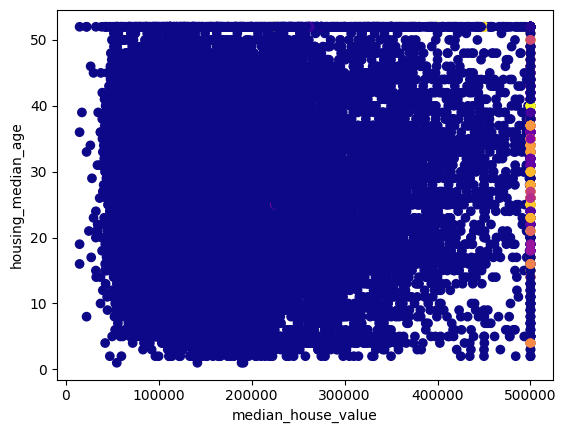

In [140]:
# вместо "..." вставить столбцы по которым будут строиться графики

plt.scatter(X[:, 0], X[:, 1], c = y_dbscan, cmap= "plasma") # plotting the clusters
plt.xlabel("median_house_value") # X-axis label
plt.ylabel("housing_median_age") # Y-axis label
plt.show()

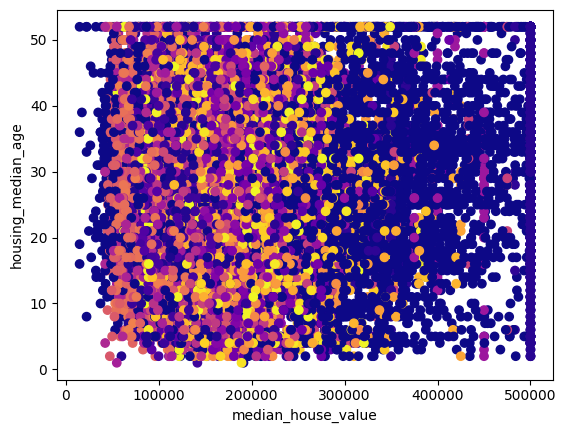

In [143]:
dbscan = DBSCAN(eps= 100,
                min_samples= 5
               )

y_dbscan = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_dbscan, cmap= "plasma") # plotting the clusters
plt.xlabel("median_house_value") # X-axis label
plt.ylabel("housing_median_age") # Y-axis label
plt.show()

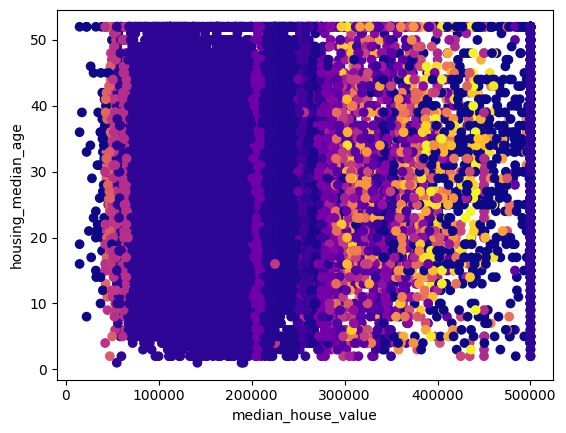

In [144]:
dbscan = DBSCAN(eps= 200,
                min_samples= 5
               )

y_dbscan = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_dbscan, cmap= "plasma") # plotting the clusters
plt.xlabel("median_house_value") # X-axis label
plt.ylabel("housing_median_age") # Y-axis label
plt.show()

In [145]:
change = df.sample(50).index
change

Int64Index([15284, 14157, 15078, 13234, 12970, 15385, 11992,  4385, 11783,
            16677, 12197,  4374,  4881, 18040, 11727,  6213, 12867,  2780,
            15436, 15059, 15588,  3106, 10715,  4936, 12926, 11480,  1998,
             2874, 15186,     5,  5597,  4552, 10461, 16031,  4122, 18739,
            15412, 15790,  7587, 17769, 11460, 11837,   526, 20301, 15183,
            12622,  7621, 12657, 12990,   347],
           dtype='int64')

In [146]:
df.loc[change,'median_house_value'] = df.loc[change,'median_house_value']*1.1


In [147]:
X = df.iloc[:, [8, 2, 1, 0]].values
X

array([[ 4.5260e+05,  4.1000e+01,  3.7880e+01, -1.2223e+02],
       [ 3.5850e+05,  2.1000e+01,  3.7860e+01, -1.2222e+02],
       [ 3.5210e+05,  5.2000e+01,  3.7850e+01, -1.2224e+02],
       ...,
       [ 9.2300e+04,  1.7000e+01,  3.9430e+01, -1.2122e+02],
       [ 8.4700e+04,  1.8000e+01,  3.9430e+01, -1.2132e+02],
       [ 8.9400e+04,  1.6000e+01,  3.9370e+01, -1.2124e+02]])

In [ ]:
# import seaborn as sns

# sns.set_style("whitegrid")
# sns.pairplot(df,hue="Species",size=3);
# plt.show()

In [148]:
dbscan = DBSCAN(eps= 200,
                min_samples= 5
               )

y_dbscan = dbscan.fit_predict(X)

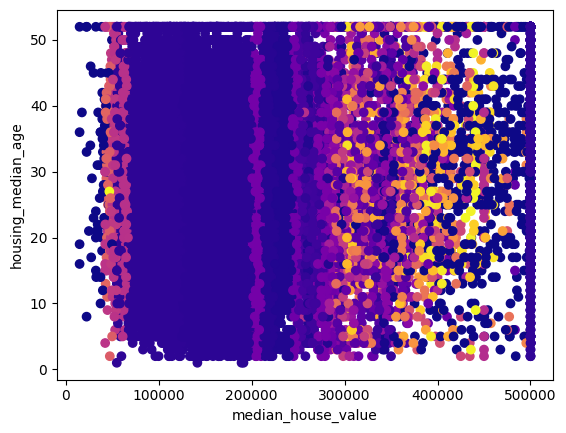

In [149]:
# вместо "..." вставить столбцы по которым будут строиться графики

plt.scatter(X[:, 0], X[:, 1], c = y_dbscan, cmap= "plasma") # plotting the clusters
plt.xlabel("median_house_value") # X-axis label
plt.ylabel("housing_median_age") # Y-axis label
plt.show()